In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nengo
from nengo import spa
%matplotlib inline

**Good tests**
```
THREE+THREE=SIX
THREE+FIVE=EIGHT
FIVE+THREE=EIGHT
```

**Fail tests**
```
FOUR+FOUR=EIGHT
ONE+FOUR=FIVE
TWO+FOUR=SIX
FOUR+ONE=FIVE
FOUR+TWO=SIX|
```

In [114]:
column_labels = ["THREE+THREE", "THREE+FIVE", "FIVE+THREE", "FOUR+FOUR",
                 "ONE+FOUR", "TWO+FOUR", "FOUR+ONE", "FOUR+TWO"]

['THREE+THREE', 'THREE+FIVE', 'FIVE+THREE', 'FOUR+FOUR', 'ONE+FOUR', 'TWO+FOUR', 'FOUR+ONE', 'FOUR+TWO']


In [8]:
#np.load("data/paperslow_count_data.npz")
af = np.load("data/multpred_learning_data.npz")
vo_load = np.load("data/multpred_learning_vocab.npz")
print(af.keys())
print(vo_load.keys())

['p_recall', 'p_keys', 'p_error', 'p_values']
['keys', 'vecs']


In [18]:
vo = spa.Vocabulary(10)
for key, val in zip(vo_load['keys'], vo_load['vecs']):
    vo.add(key, val)

In [10]:
recall = af['p_recall']
print(recall.shape)

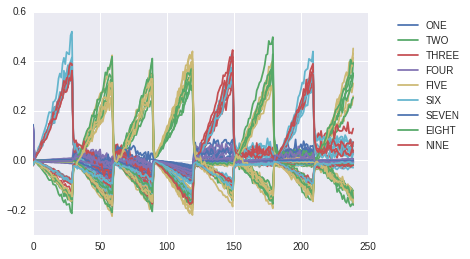

In [125]:
for r_i in range(run_num):
    plt.plot(spa.similarity(recall[r_i][360:], vo))
plt.legend(vo.keys, bbox_to_anchor=(1.3,1))

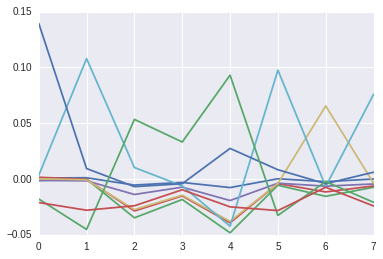

In [74]:
tmp = spa.similarity(recall[0][s_win:], vo)
plt.plot(tmp[::30])

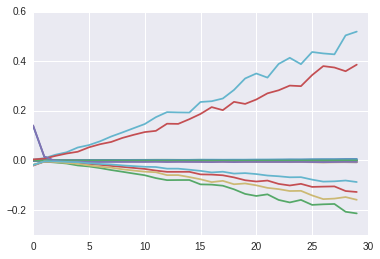

In [133]:
for r_i in range(run_num):
    simi = spa.similarity(recall[r_i][s_win:], vo)
    resimi = simi.reshape((trial_num, step, dims))
    plt.plot(resimi[0])

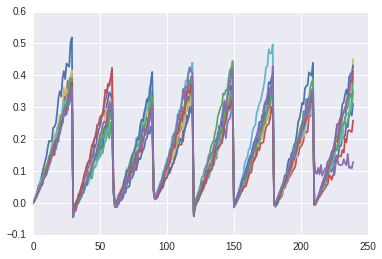

In [137]:
run_num = 10
trial_num = 8
dims = 9
step = 30
max_res = np.zeros((run_num, trial_num))

for r_i in range(run_num):
    simi = spa.similarity(recall[r_i][s_win:], vo).reshape((trial_num, step, dims))
    max_dim = np.argmax(np.sum(simi, axis=1), axis=1)
    
    sing_dim = np.zeros((trial_num, step))
    for t_i in range(trial_num):
        sing_dim[t_i] = simi[t_i, :, max_dim[t_i]]
    
    plt.plot(sing_dim.flatten())
    max_res[r_i] = np.max(sing_dim, axis=1)

In [139]:
learn_res = pd.DataFrame(max_res, columns=column_labels)

(10, 8)


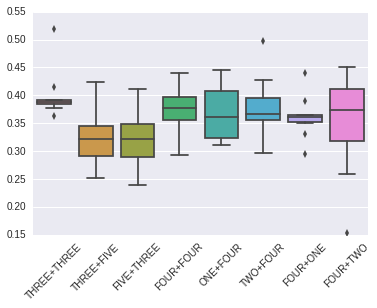

In [140]:
ax = sns.boxplot(data=learn_res)
ax.set_xticklabels(column_labels, rotation=45)
print(max_res.shape)

(10, 8)


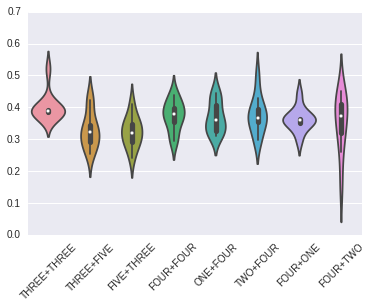

In [142]:
ax = sns.violinplot(data=learn_res)
ax.set_xticklabels(column_labels, rotation=45)
ax.set_xticks(np.arange(8))
print(max_res.shape)